## 正規分布に近づける

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import os

np.random.seed(777)
if os.path.exists("../../stylesheet/k_dm.mplstyle"):
    plt.style.use("../../stylesheet/k_dm.mplstyle")

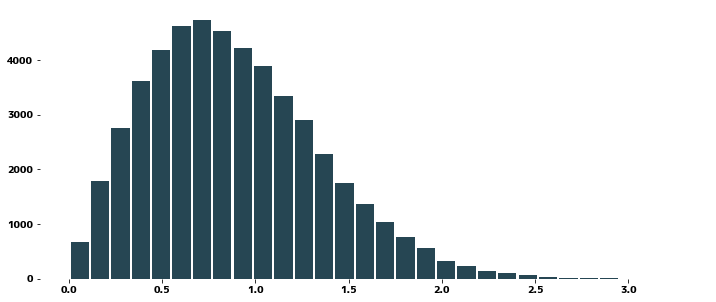

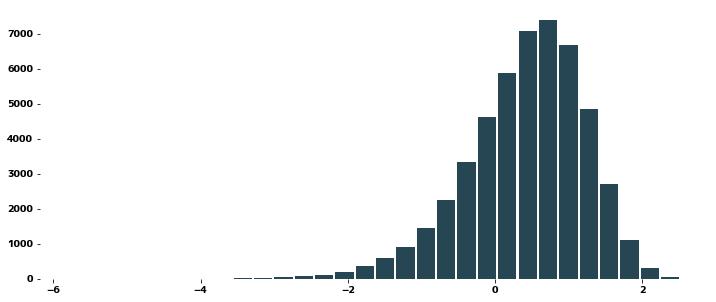

In [4]:
from scipy import stats
import numpy as np

plt.figure(figsize=(12, 5))
data_wb = np.random.weibull(2.0, size=50000)
plt.hist(data_wb, bins=30, rwidth=0.9)
plt.show()


plt.figure(figsize=(12, 5))
data_lg = stats.loggamma.rvs(2.0, size=50000)
plt.hist(data_lg, bins=30, rwidth=0.9)
plt.show()

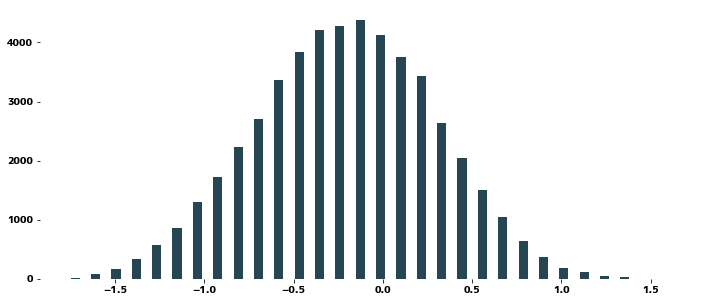

In [5]:
from scipy.stats import boxcox

plt.figure(figsize=(12, 5))
plt.hist(boxcox(data_wb), bins=30, rwidth=0.9)
plt.show()

In [6]:
try:
    plt.figure(figsize=(12, 5))
    plt.hist(boxcox(data_lg), bins=30, rwidth=0.9)
    plt.show()
except ValueError as e:
    print(f"エラーの内容： ValueError {e.args}")

エラーの内容： ValueError ('Data must be positive.',)


<Figure size 864x360 with 0 Axes>

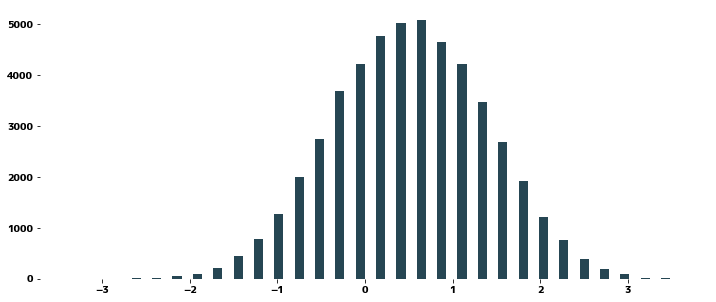

In [7]:
from scipy.stats import yeojohnson

plt.figure(figsize=(12, 5))
plt.hist(yeojohnson(data_lg), bins=30, rwidth=0.9)
plt.show()

## リッジ回帰をフィッティングしてみる

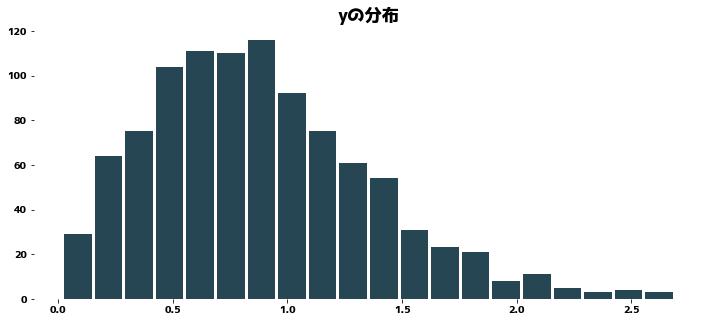

In [8]:
from sklearn.linear_model import Ridge

N = 1000
rng = np.random.RandomState(0)
y = np.random.weibull(2.0, size=N)

X = rng.randn(N, 5)
X[:, 0] = np.sqrt(y) + np.random.rand(N) / 10

plt.figure(figsize=(12, 5))
plt.hist(y, bins=20, rwidth=0.9)
plt.title("yの分布")
plt.show()

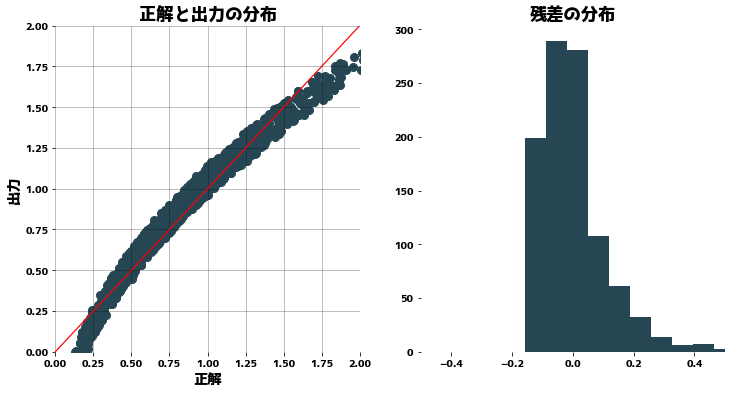

In [9]:
clf = Ridge(alpha=1.0)
clf.fit(X, y)
pred = clf.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("正解と出力の分布")
plt.scatter(y, pred)
plt.plot([0, 2], [0, 2], "r")
plt.xlabel("正解")
plt.ylabel("出力")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid()
plt.subplot(122)
plt.title("残差の分布")
plt.hist(y - pred)
plt.xlim(-0.5, 0.5)
plt.show()

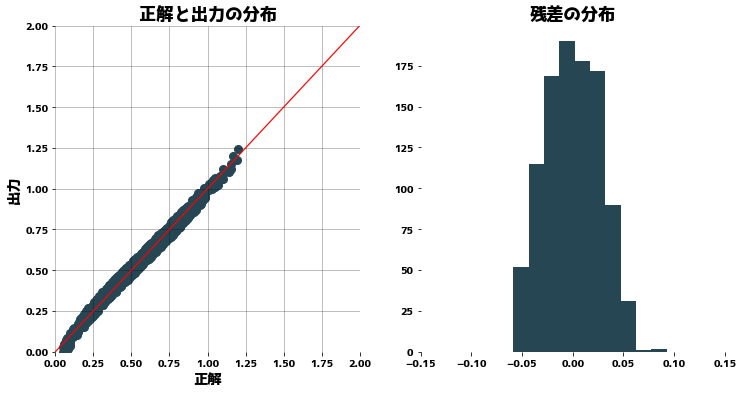

In [10]:
clf = Ridge(alpha=1.0)
clf.fit(X, yeojohnson(y)[0])
pred = clf.predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("正解と出力の分布")
plt.scatter(yeojohnson(y)[0], pred)
plt.plot([0, 2], [0, 2], "r")
plt.xlabel("正解")
plt.ylabel("出力")
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.grid()
plt.subplot(122)
plt.title("残差の分布")
plt.hist(yeojohnson(y)[0] - pred)
plt.xlim(-0.15, 0.15)
plt.show()